# Mintun1984Model for Image-Derived Input Functions and Twilite Data

## Setup

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from IOImplementations import BaseIO
from IOImplementations import BoxcarIO
from IOImplementations import RadialArteryIO
from Mintun1984Model import Mintun1984Model
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# define data & models
petdir_arch = os.path.join(os.getenv("SINGULARITY_HOME"), "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet")
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
#petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
#idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

# most reasonable fit from:  truths=[0.5, 0.245, 0.775, 5.6, -15, 0.05]
mm_twil = Mintun1984Model(
    twil, 
    pet,
    parc_index=25,
    truths=[0.504947, 0.364200, 0.687735, 6.188487, -17.166152, 8.929869, 0.034889],
    nlive=1000,
    tag="main7-rc1p85-vrc1-3000"
)
mm_idif = Mintun1984Model(
    idif, 
    pet,
    parc_index=25,
    truths=[0.373545, 0.927540, 0.644307, 0.088477, -29.793043, 8.232628, 0.016948],
    nlive=1000,
    tag="main7-rc1p85-vrc1-3000"
)

parc_index = 25

RadialArtery: found data for tracer oo
Boxcar: found data for tracer oo


## Inspect Mintun1984Model twil

In [4]:
pprint(mm_twil.data(mm_twil.truths))

{'delta_time': np.int64(1),
 'halflife': 122.2416,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.09335292,
        2.14427664, 12.08792904, 26.21379852, 21.65092574,  5.52496794,
        0.50724496,  0.34950503,  1.05879373,  2.94641775,  5.93060272,
        9.15983737, 11.55402307, 12.42543379, 11.73500689,  9.94720516,
        7.70367798,  5.54553457,  3.78748739,  2.52661692,  1.71754053,
        1.25332396,  1.02167403,  0.93198036,  0.92155519,  0.95146847,
        0.99941298,  1.05332902,  1.1069294 ,  1.15698352,  1.20183357,
        1.24064382,  1.27303875,  1.2989294 ,  1.31842383,  1.33177445,
        1.33934061,  1.34155791,  1.33891406,  1.33192627,  1.32112397,
        1.30703329,  1.2901659 ,  1.27100945,  1.25002102,  1.227

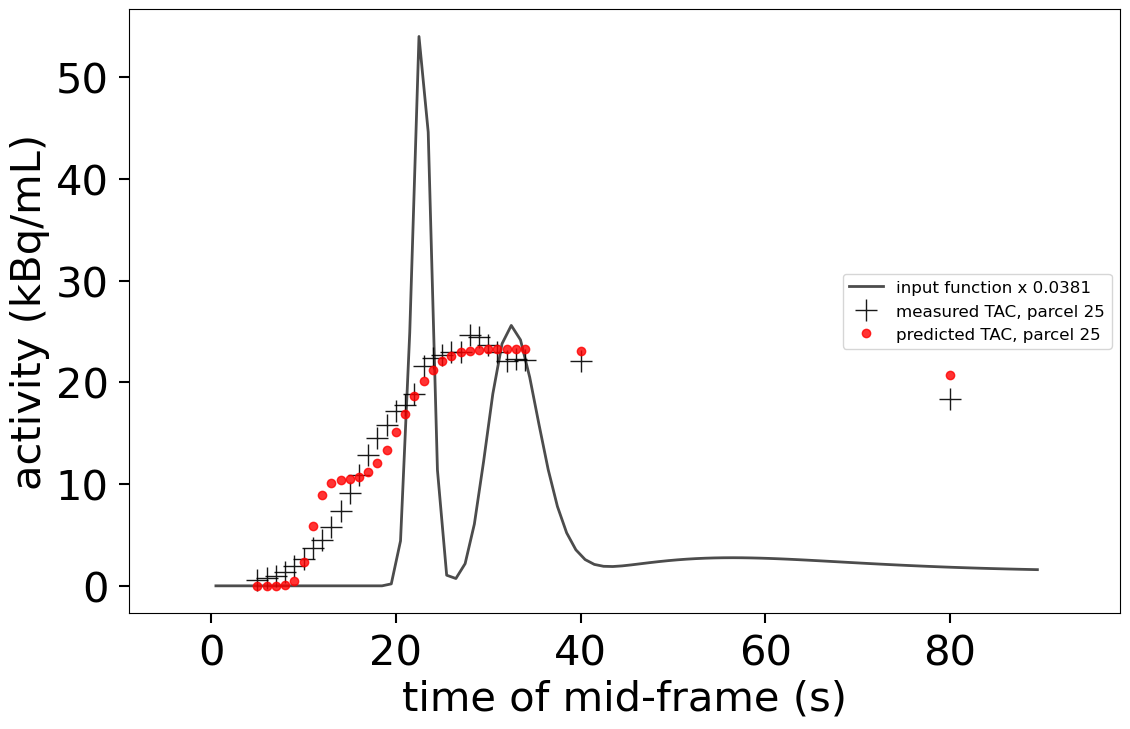

In [5]:
mm_twil.plot_truths(parc_index=parc_index)

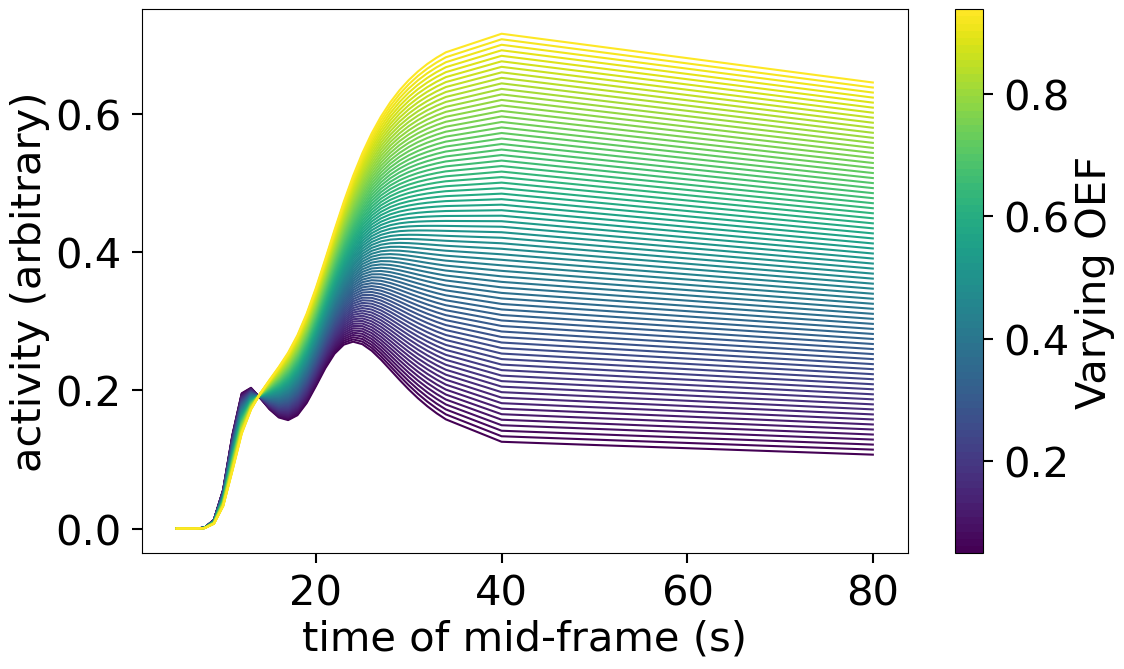

In [6]:
mm_twil.plot_variations(0, 0.05, 0.95, mm_twil.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

25457it [01:17, 329.89it/s, batch: 1 | bound: 8 | nc: 1 | ncall: 1162207 | eff(%):  2.092 | loglstar: 60.626 < 66.793 < 63.153 | logz: 51.154 +/-  0.108 | stop:  0.855]            


Parameter OEF            : 0.5049 [0.4387, 0.6889]
Parameter $f_{H_2O}$     : 0.3642 [0.1103, 1.1762]
Parameter $v_p + 0.5 v_c$: 0.6877 [0.1335, 0.9924]
Parameter $t_0$          : 6.1885 [0.3742, 12.3612]
Parameter $\tau_a$       : -17.1662 [-28.0984, -10.9521]
Parameter $\tau_d$       : 8.9299 [5.5742, 12.8289]
Parameter $\sigma$       : 0.0349 [0.0269, 0.0467]
Parameter OEF            : 0.5049 [0.4387, 0.6889]
Parameter $f_{H_2O}$     : 0.3642 [0.1103, 1.1762]
Parameter $v_p + 0.5 v_c$: 0.6877 [0.1335, 0.9924]
Parameter $t_0$          : 6.1885 [0.3742, 12.3612]
Parameter $\tau_a$       : -17.1662 [-28.0984, -10.9521]
Parameter $\tau_d$       : 8.9299 [5.5742, 12.8289]
Parameter $\sigma$       : 0.0349 [0.0269, 0.0467]


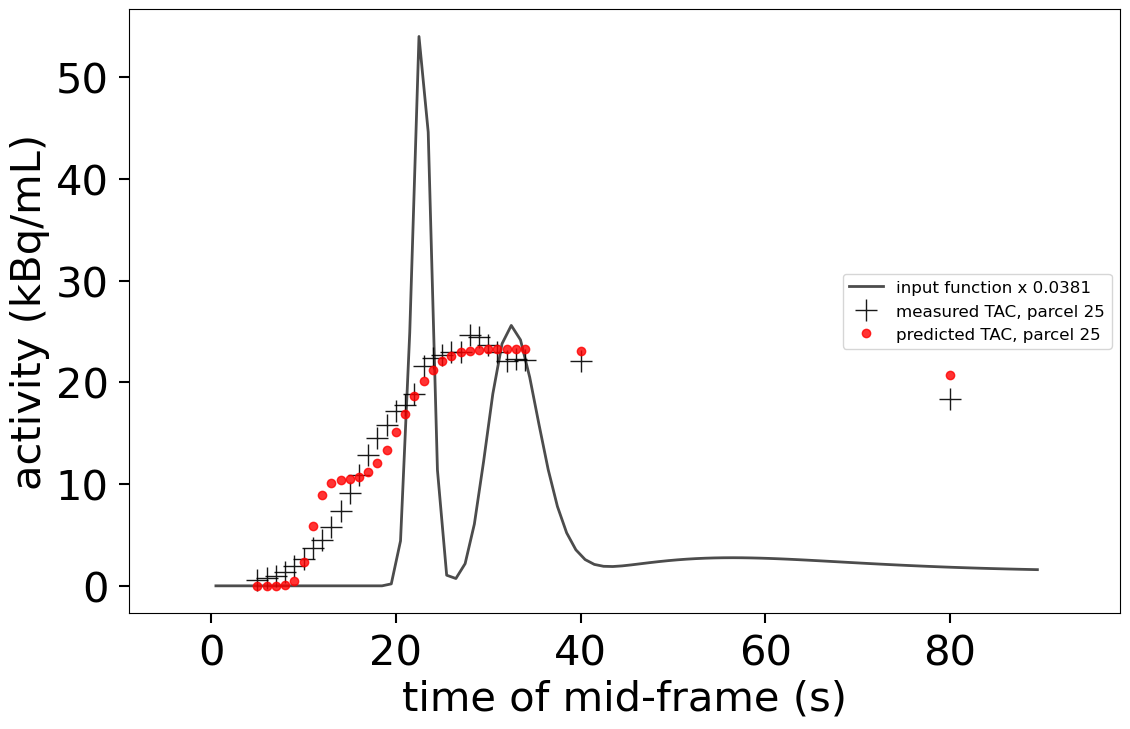

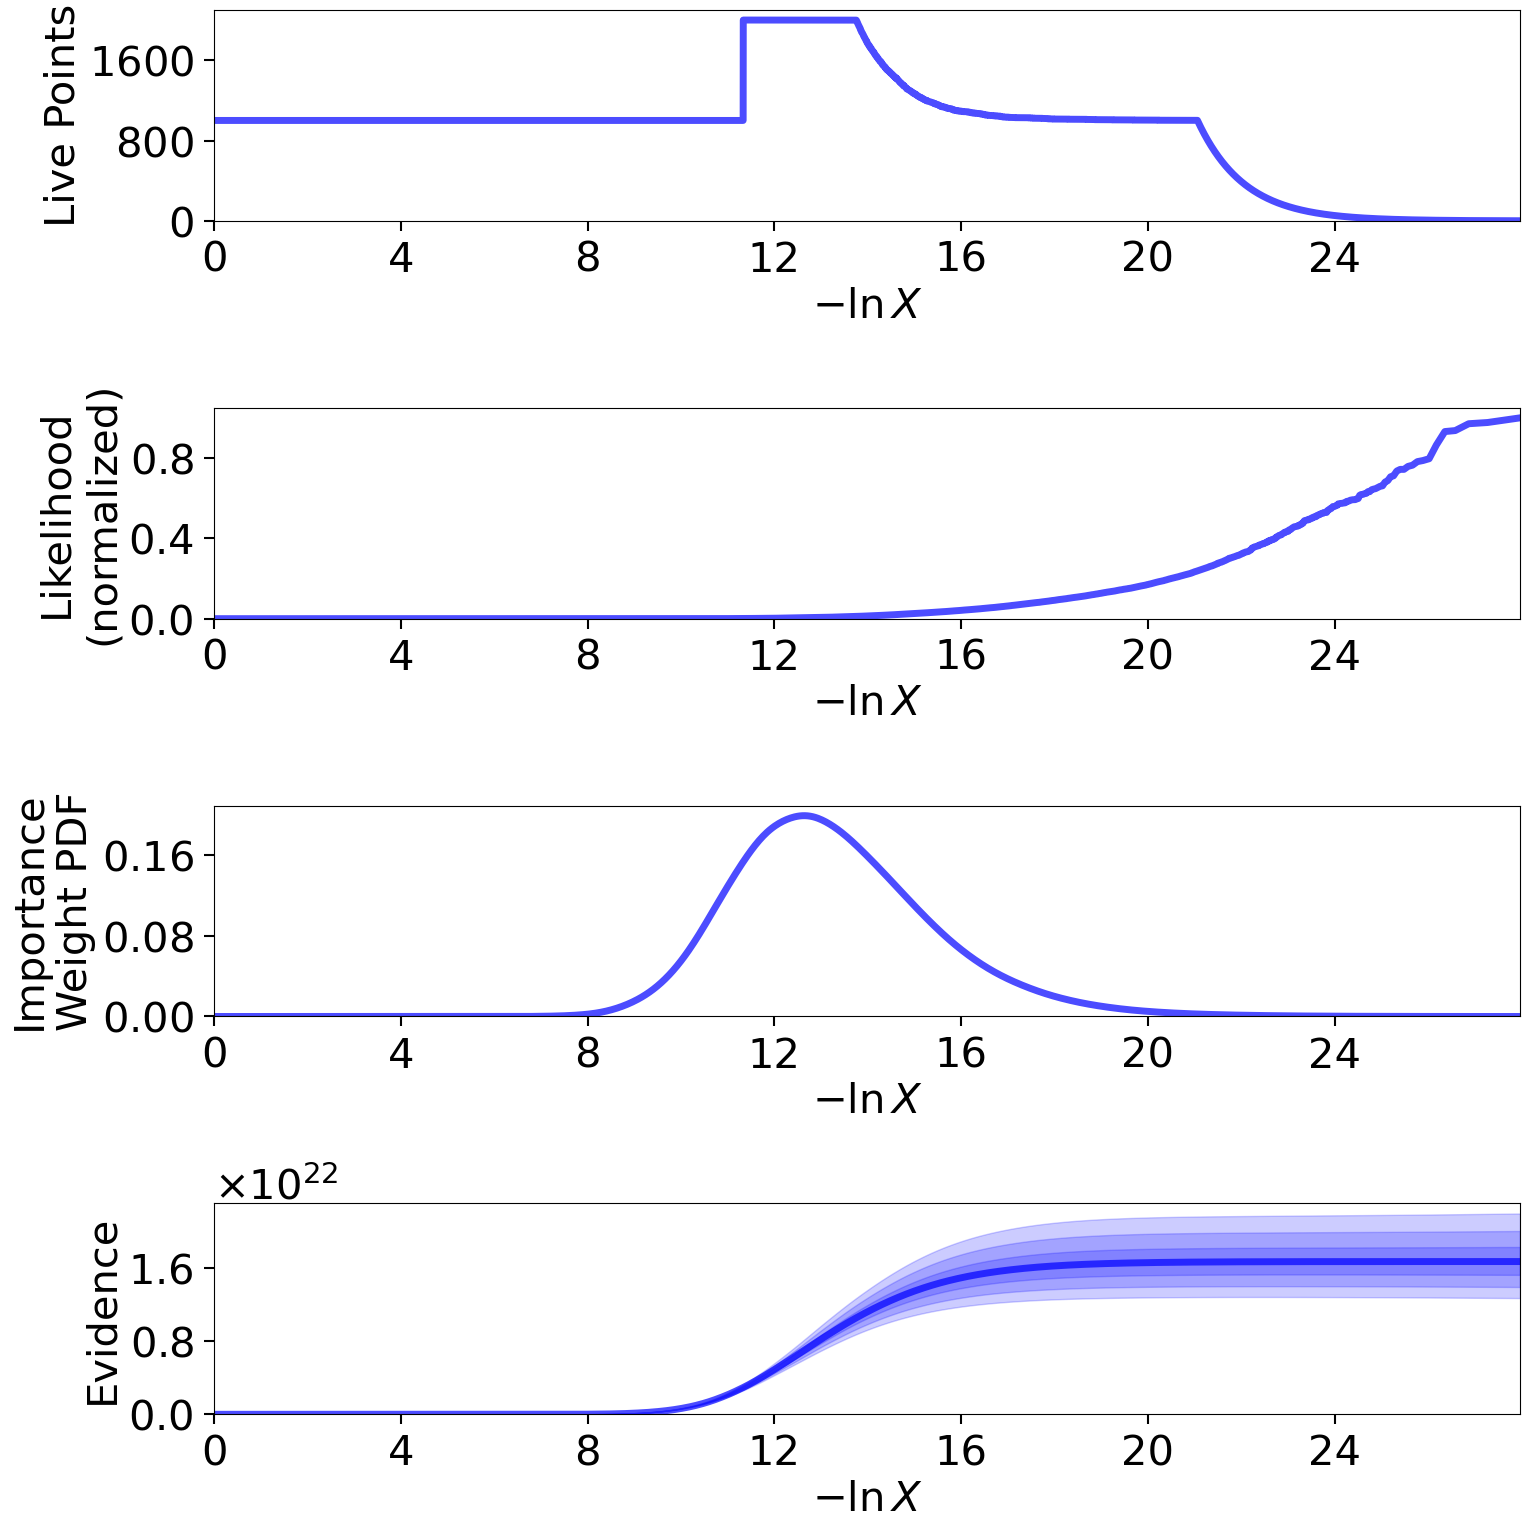

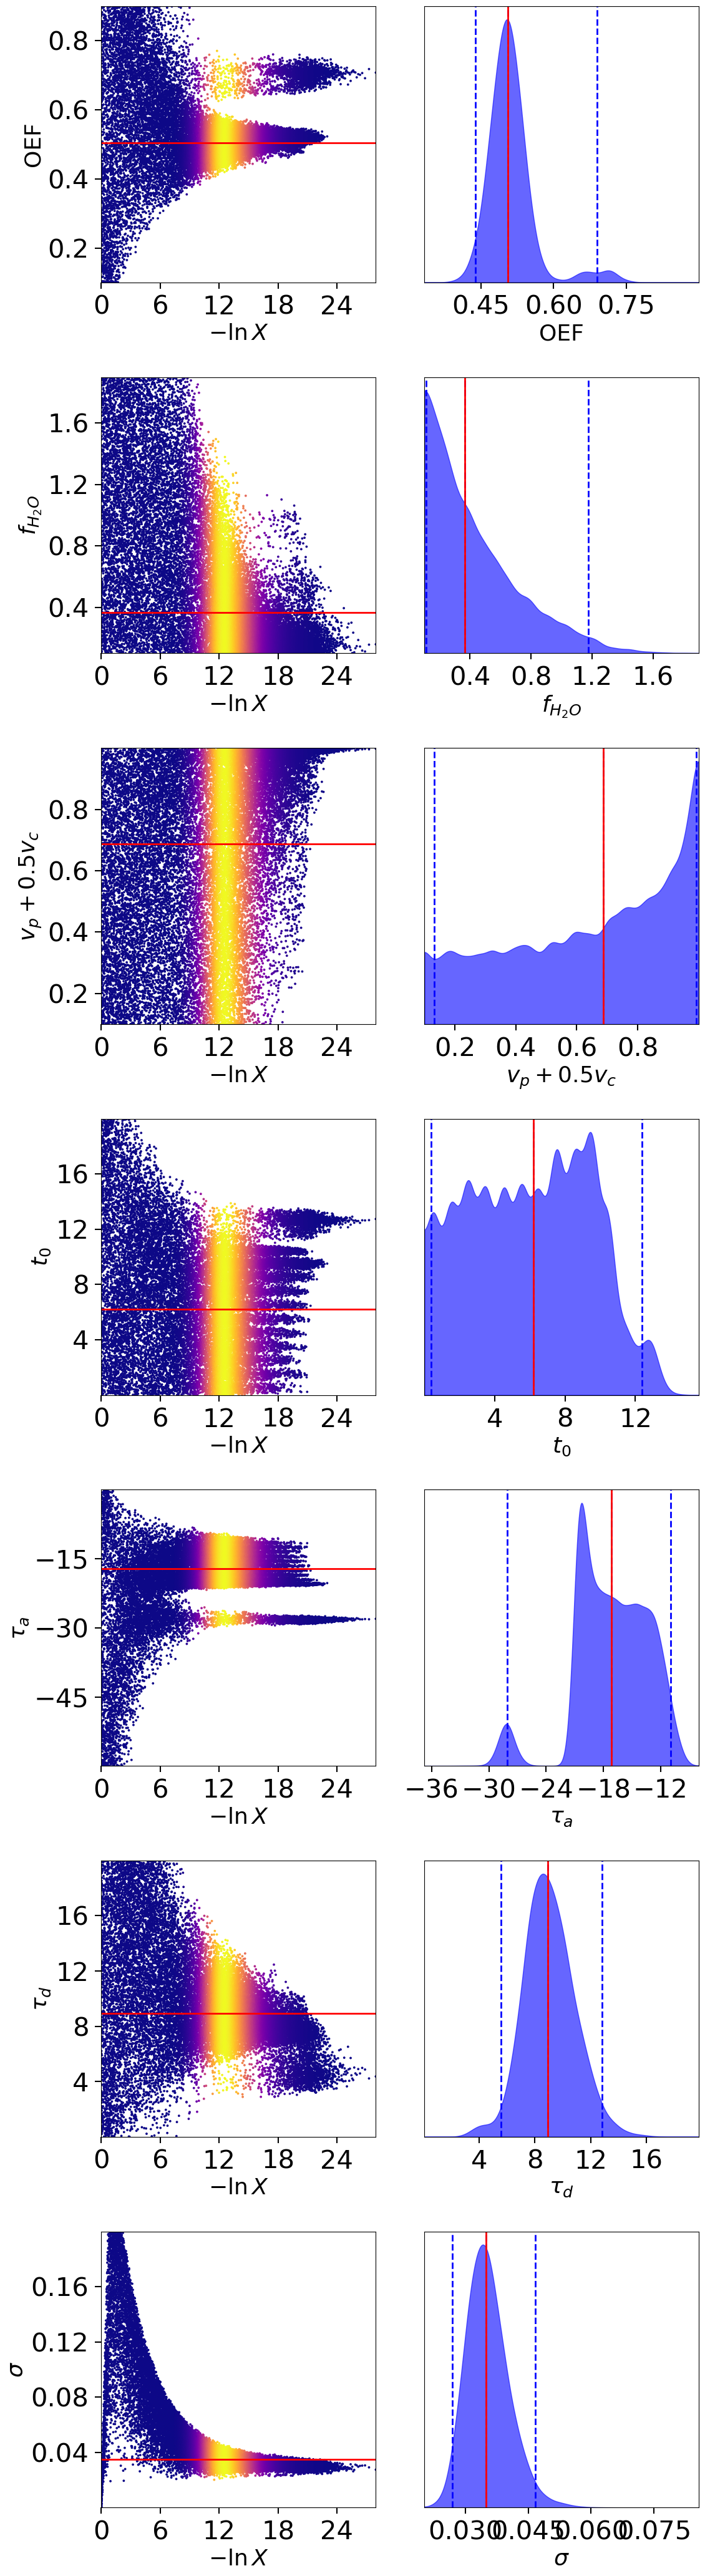

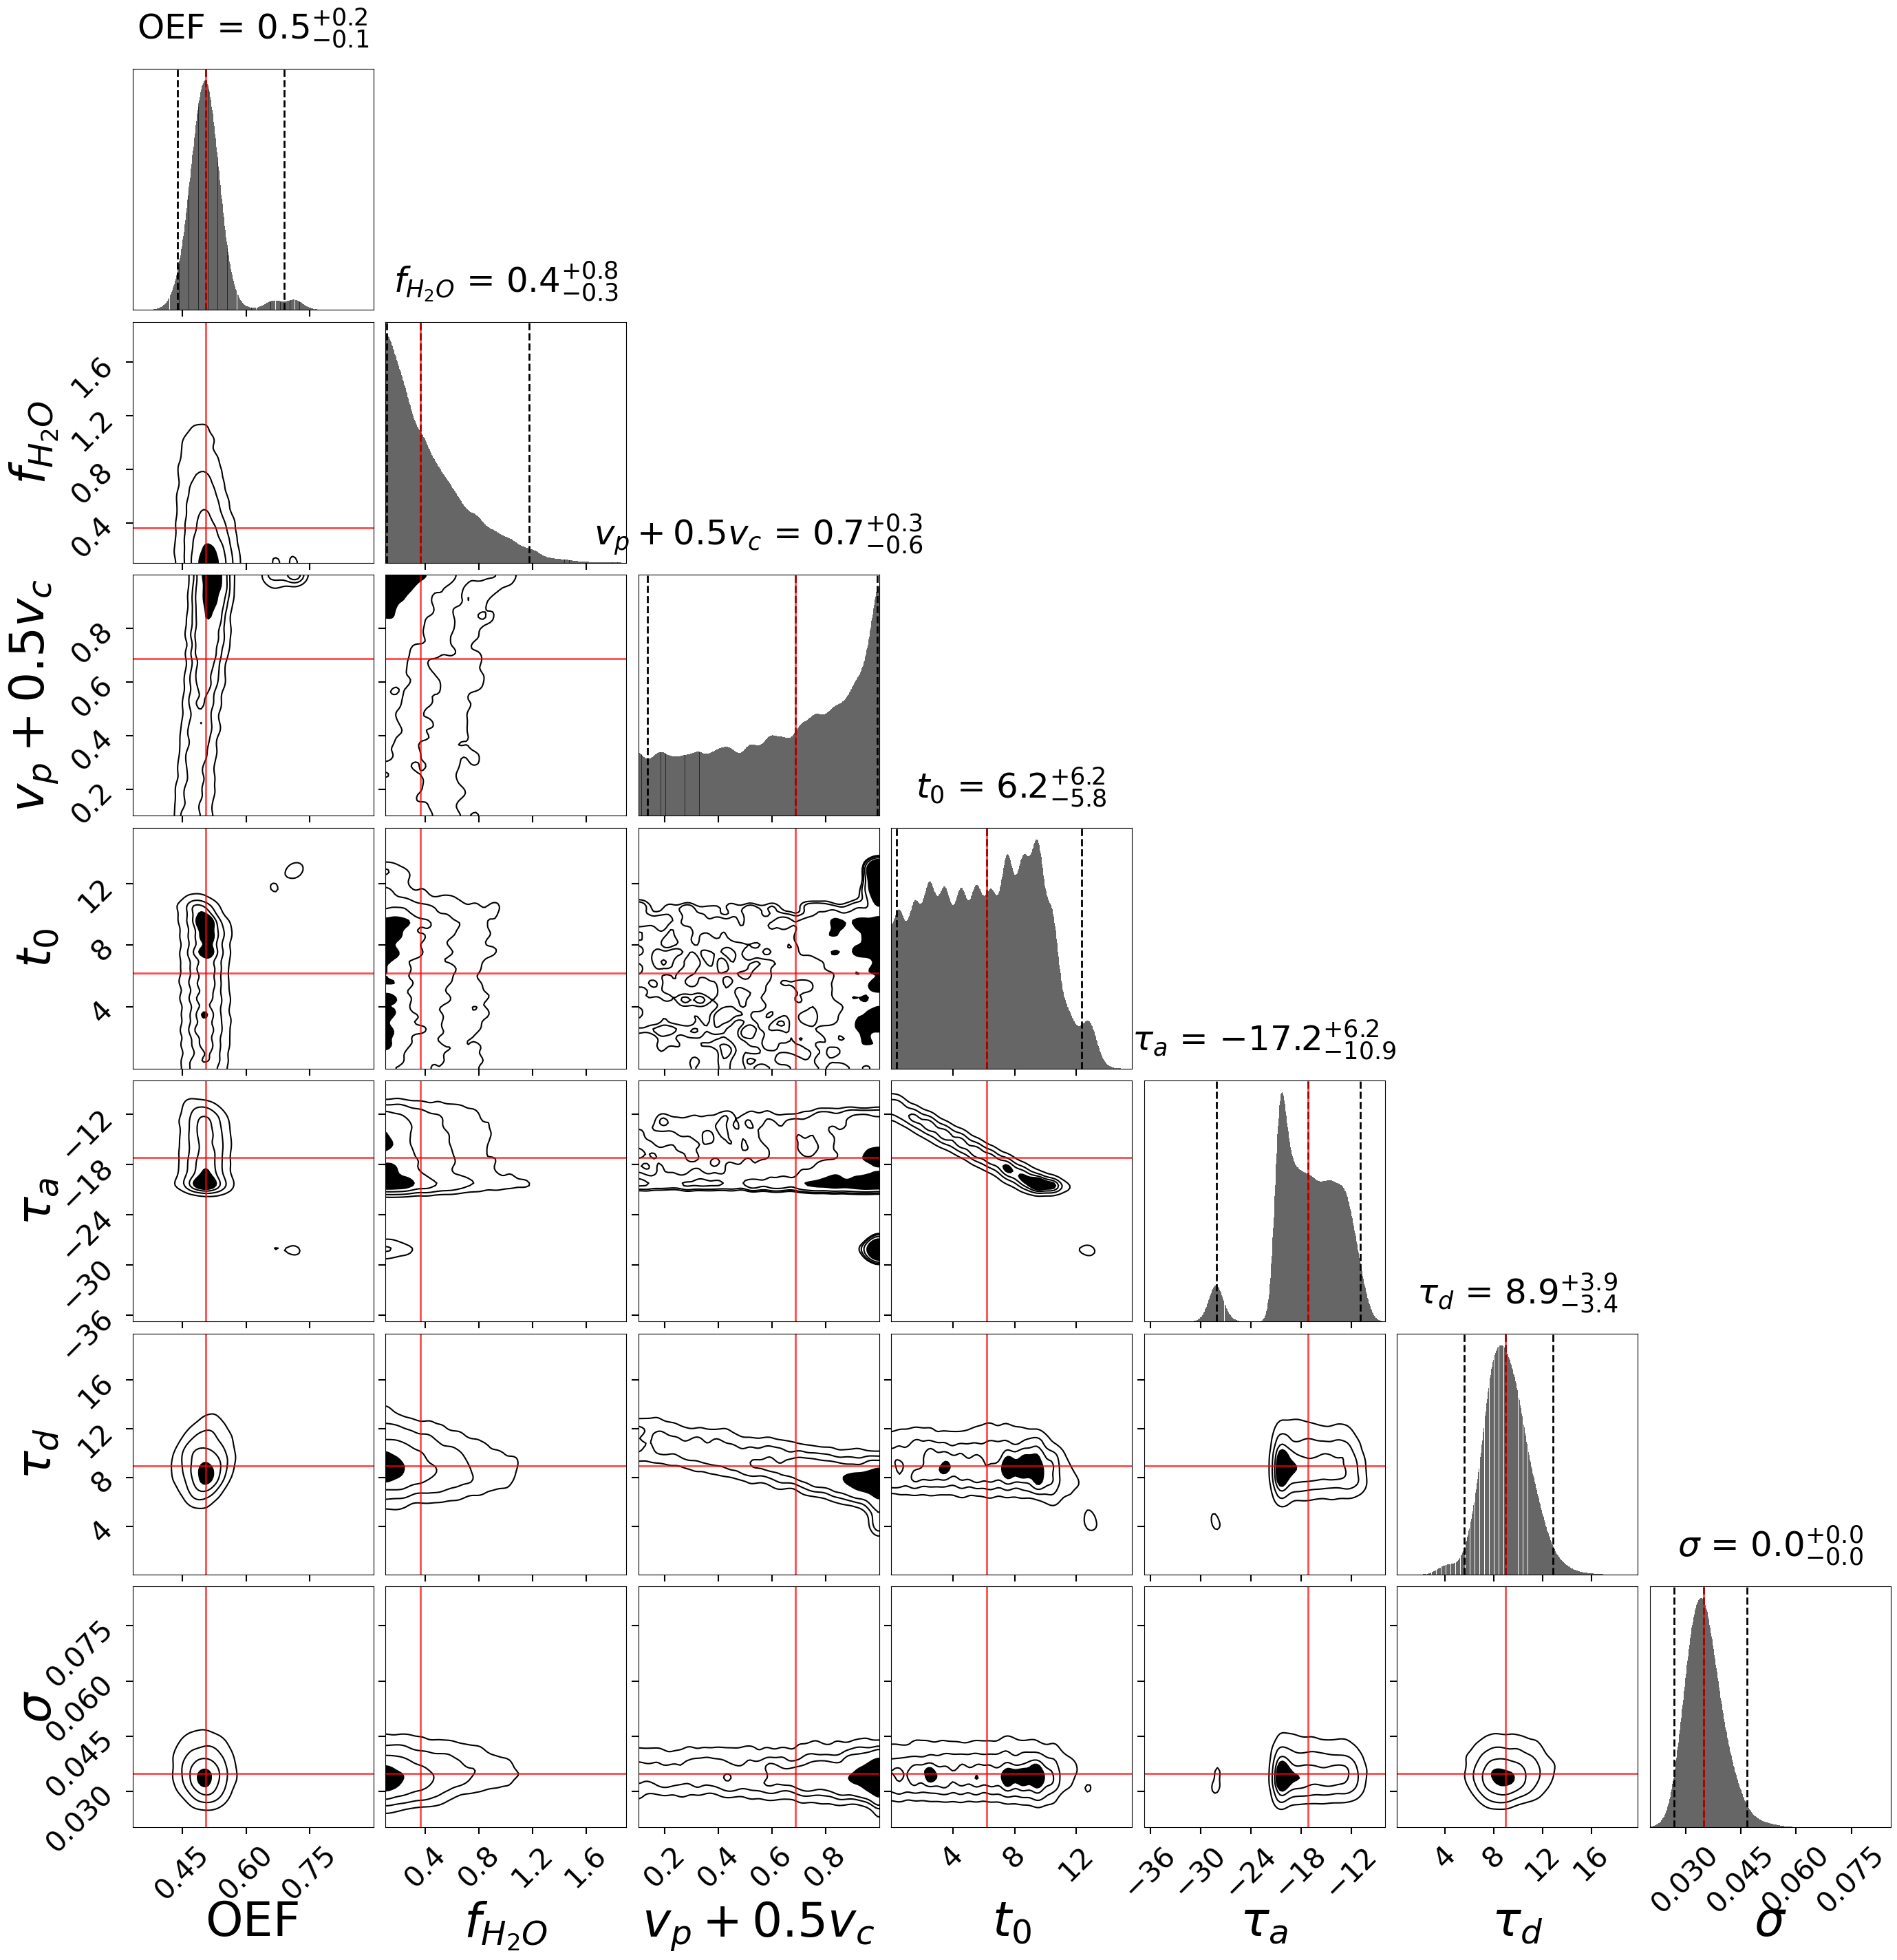

In [7]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_twil.save_results(res_twil, "playground-for-M1984M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_twil.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

In [8]:
pprint(mm_twil.data(mm_twil.truths))

{'delta_time': np.int64(1),
 'halflife': 122.2416,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.09335292,
        2.14427664, 12.08792904, 26.21379852, 21.65092574,  5.52496794,
        0.50724496,  0.34950503,  1.05879373,  2.94641775,  5.93060272,
        9.15983737, 11.55402307, 12.42543379, 11.73500689,  9.94720516,
        7.70367798,  5.54553457,  3.78748739,  2.52661692,  1.71754053,
        1.25332396,  1.02167403,  0.93198036,  0.92155519,  0.95146847,
        0.99941298,  1.05332902,  1.1069294 ,  1.15698352,  1.20183357,
        1.24064382,  1.27303875,  1.2989294 ,  1.31842383,  1.33177445,
        1.33934061,  1.34155791,  1.33891406,  1.33192627,  1.32112397,
        1.30703329,  1.2901659 ,  1.27100945,  1.25002102,  1.227

## Inspect Mintun1984Model idif

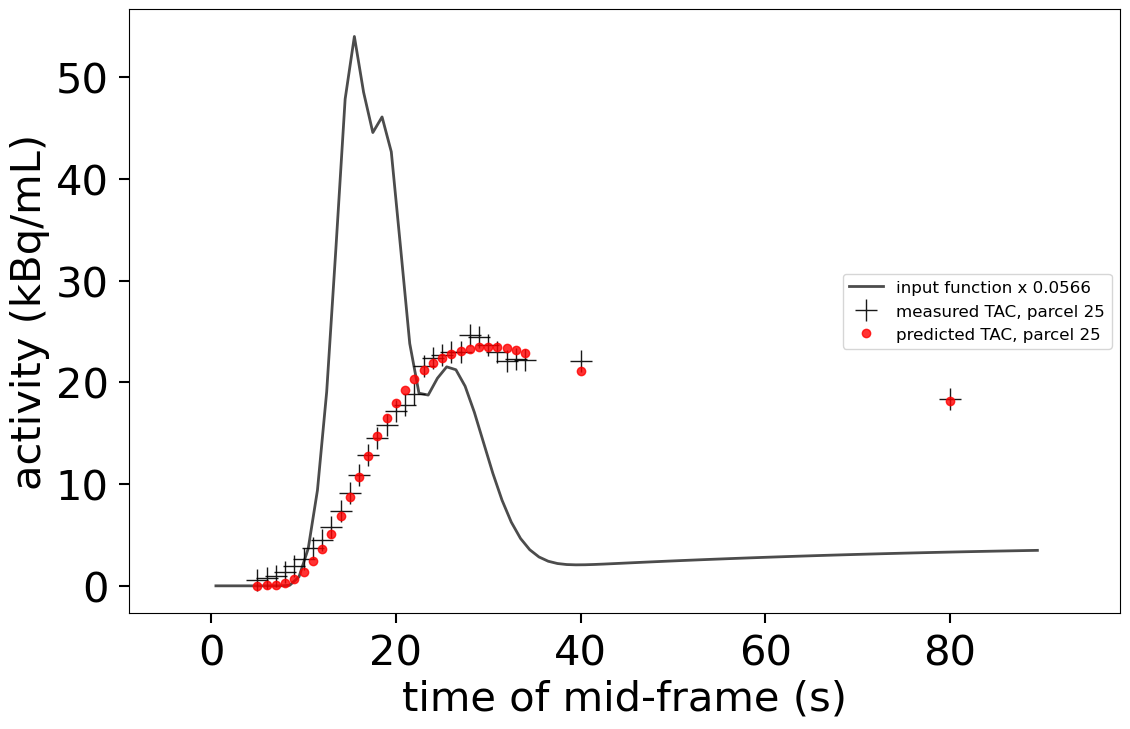

In [9]:
mm_idif.plot_truths(parc_index=parc_index)

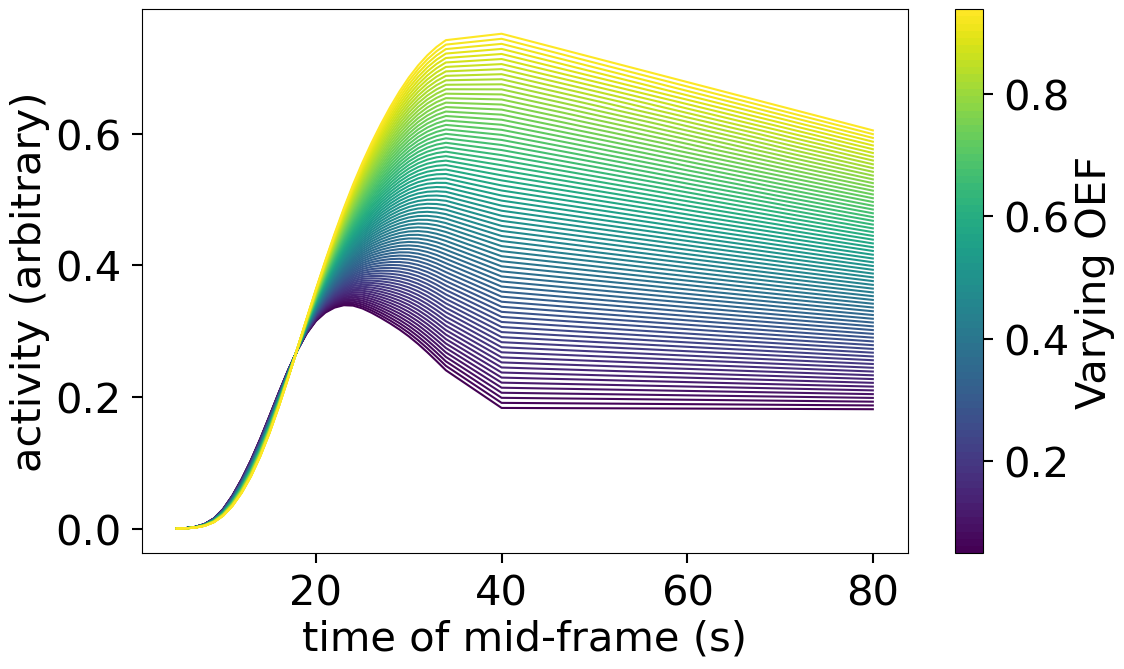

In [10]:
mm_idif.plot_variations(0, 0.05, 0.95 , mm_idif.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

21893it [01:45, 207.33it/s, batch: 2 | bound: 1 | nc: 1 | ncall: 923263 | eff(%):  2.242 | loglstar: 84.254 < 88.421 < 84.893 | logz: 76.537 +/-  0.084 | stop:  0.901]            


Parameter OEF            : 0.3738 [0.3286, 0.4155]
Parameter $f_{H_2O}$     : 0.9240 [0.4167, 1.2659]
Parameter $v_p + 0.5 v_c$: 0.6099 [0.1288, 0.9828]
Parameter $t_0$          : 10.2285 [0.4976, 19.4847]
Parameter $\tau_a$       : -30.3296 [-58.5694, -1.6782]
Parameter $\tau_d$       : 8.5188 [6.4945, 10.8422]
Parameter $\sigma$       : 0.0165 [0.0130, 0.0220]
Parameter OEF            : 0.3738 [0.3286, 0.4155]
Parameter $f_{H_2O}$     : 0.9240 [0.4167, 1.2659]
Parameter $v_p + 0.5 v_c$: 0.6099 [0.1288, 0.9828]
Parameter $t_0$          : 10.2285 [0.4976, 19.4847]
Parameter $\tau_a$       : -30.3296 [-58.5694, -1.6782]
Parameter $\tau_d$       : 8.5188 [6.4945, 10.8422]
Parameter $\sigma$       : 0.0165 [0.0130, 0.0220]


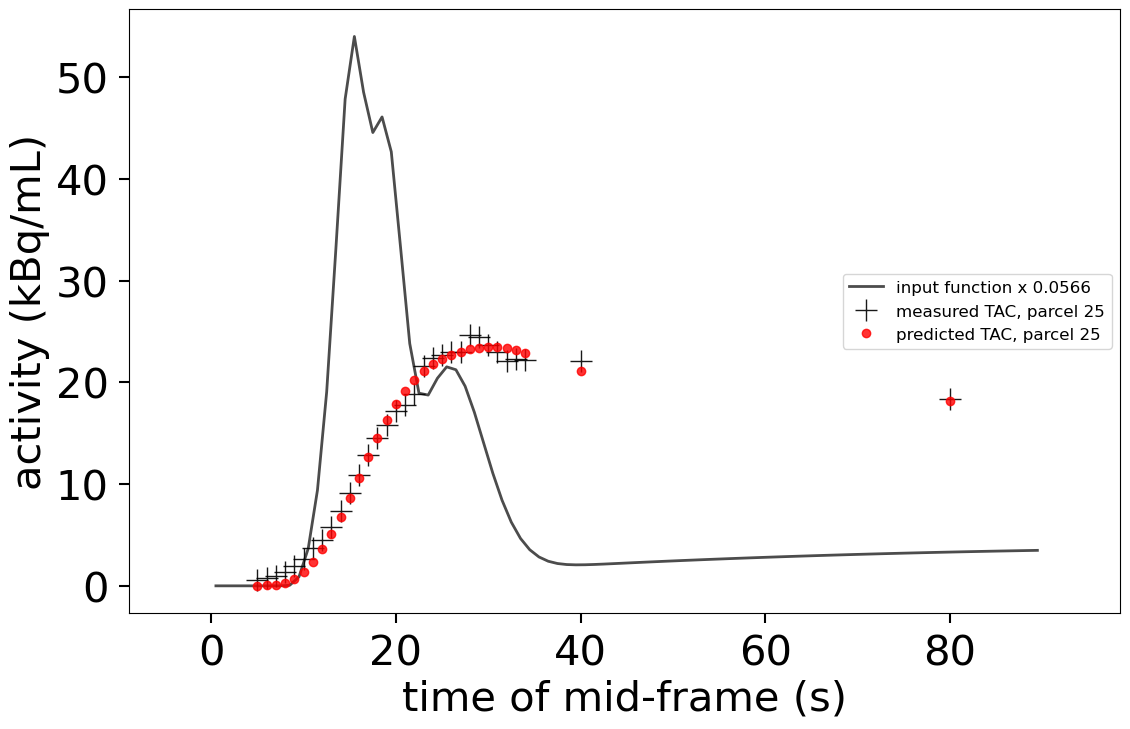

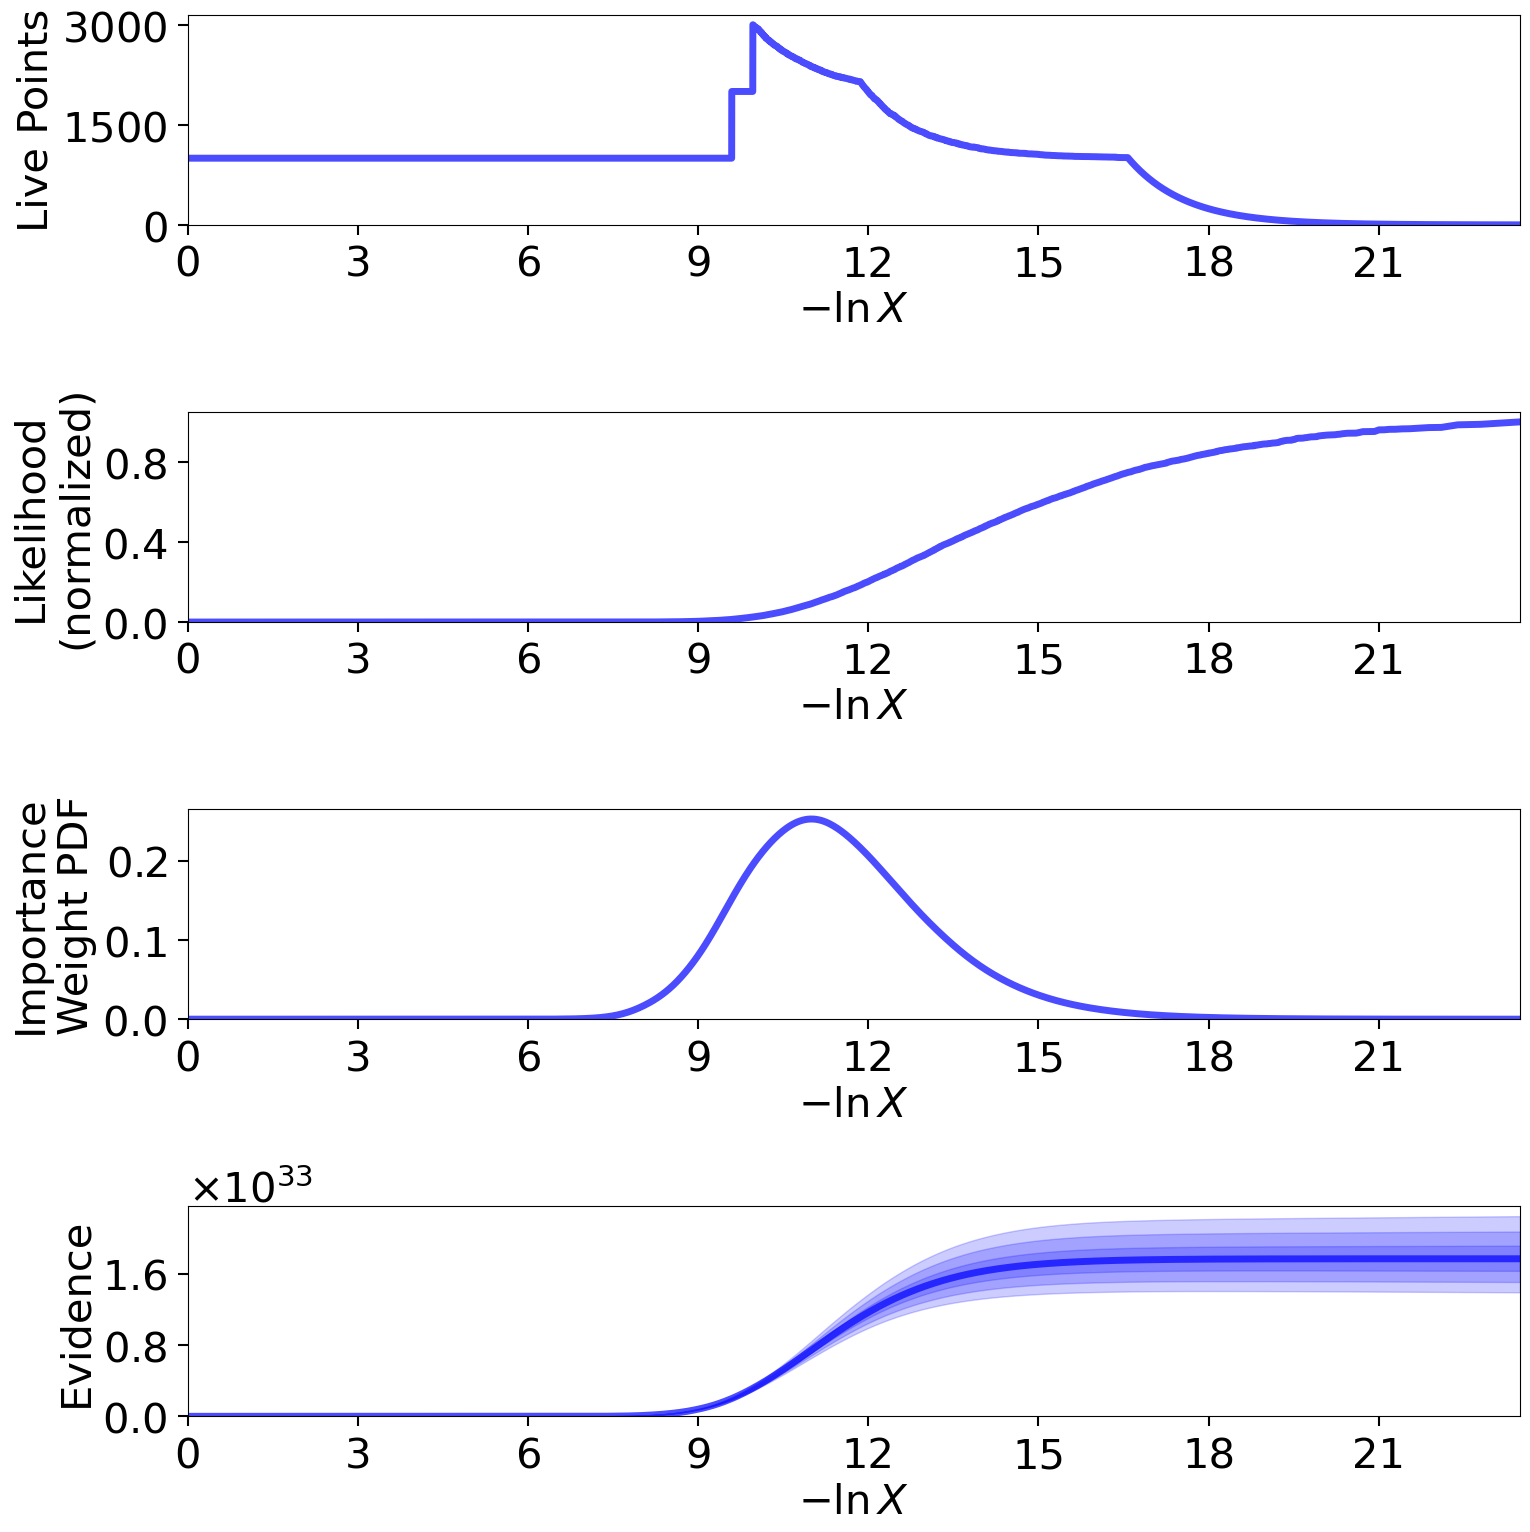

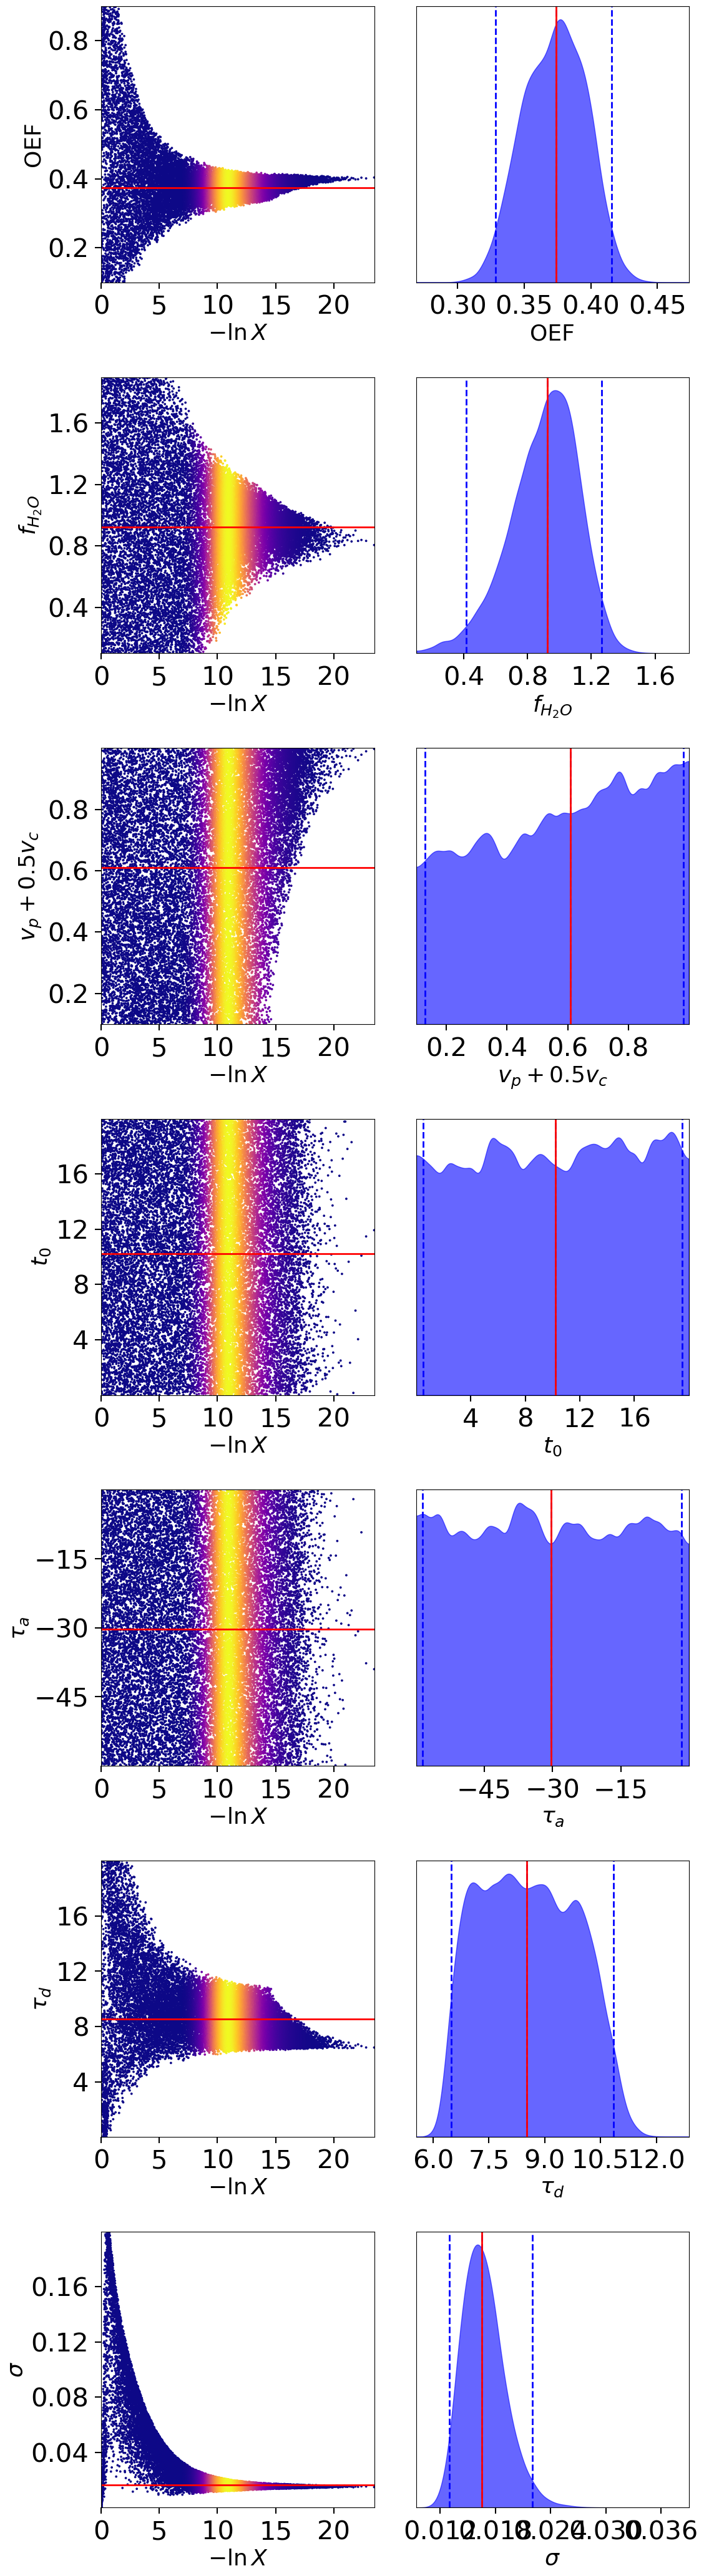

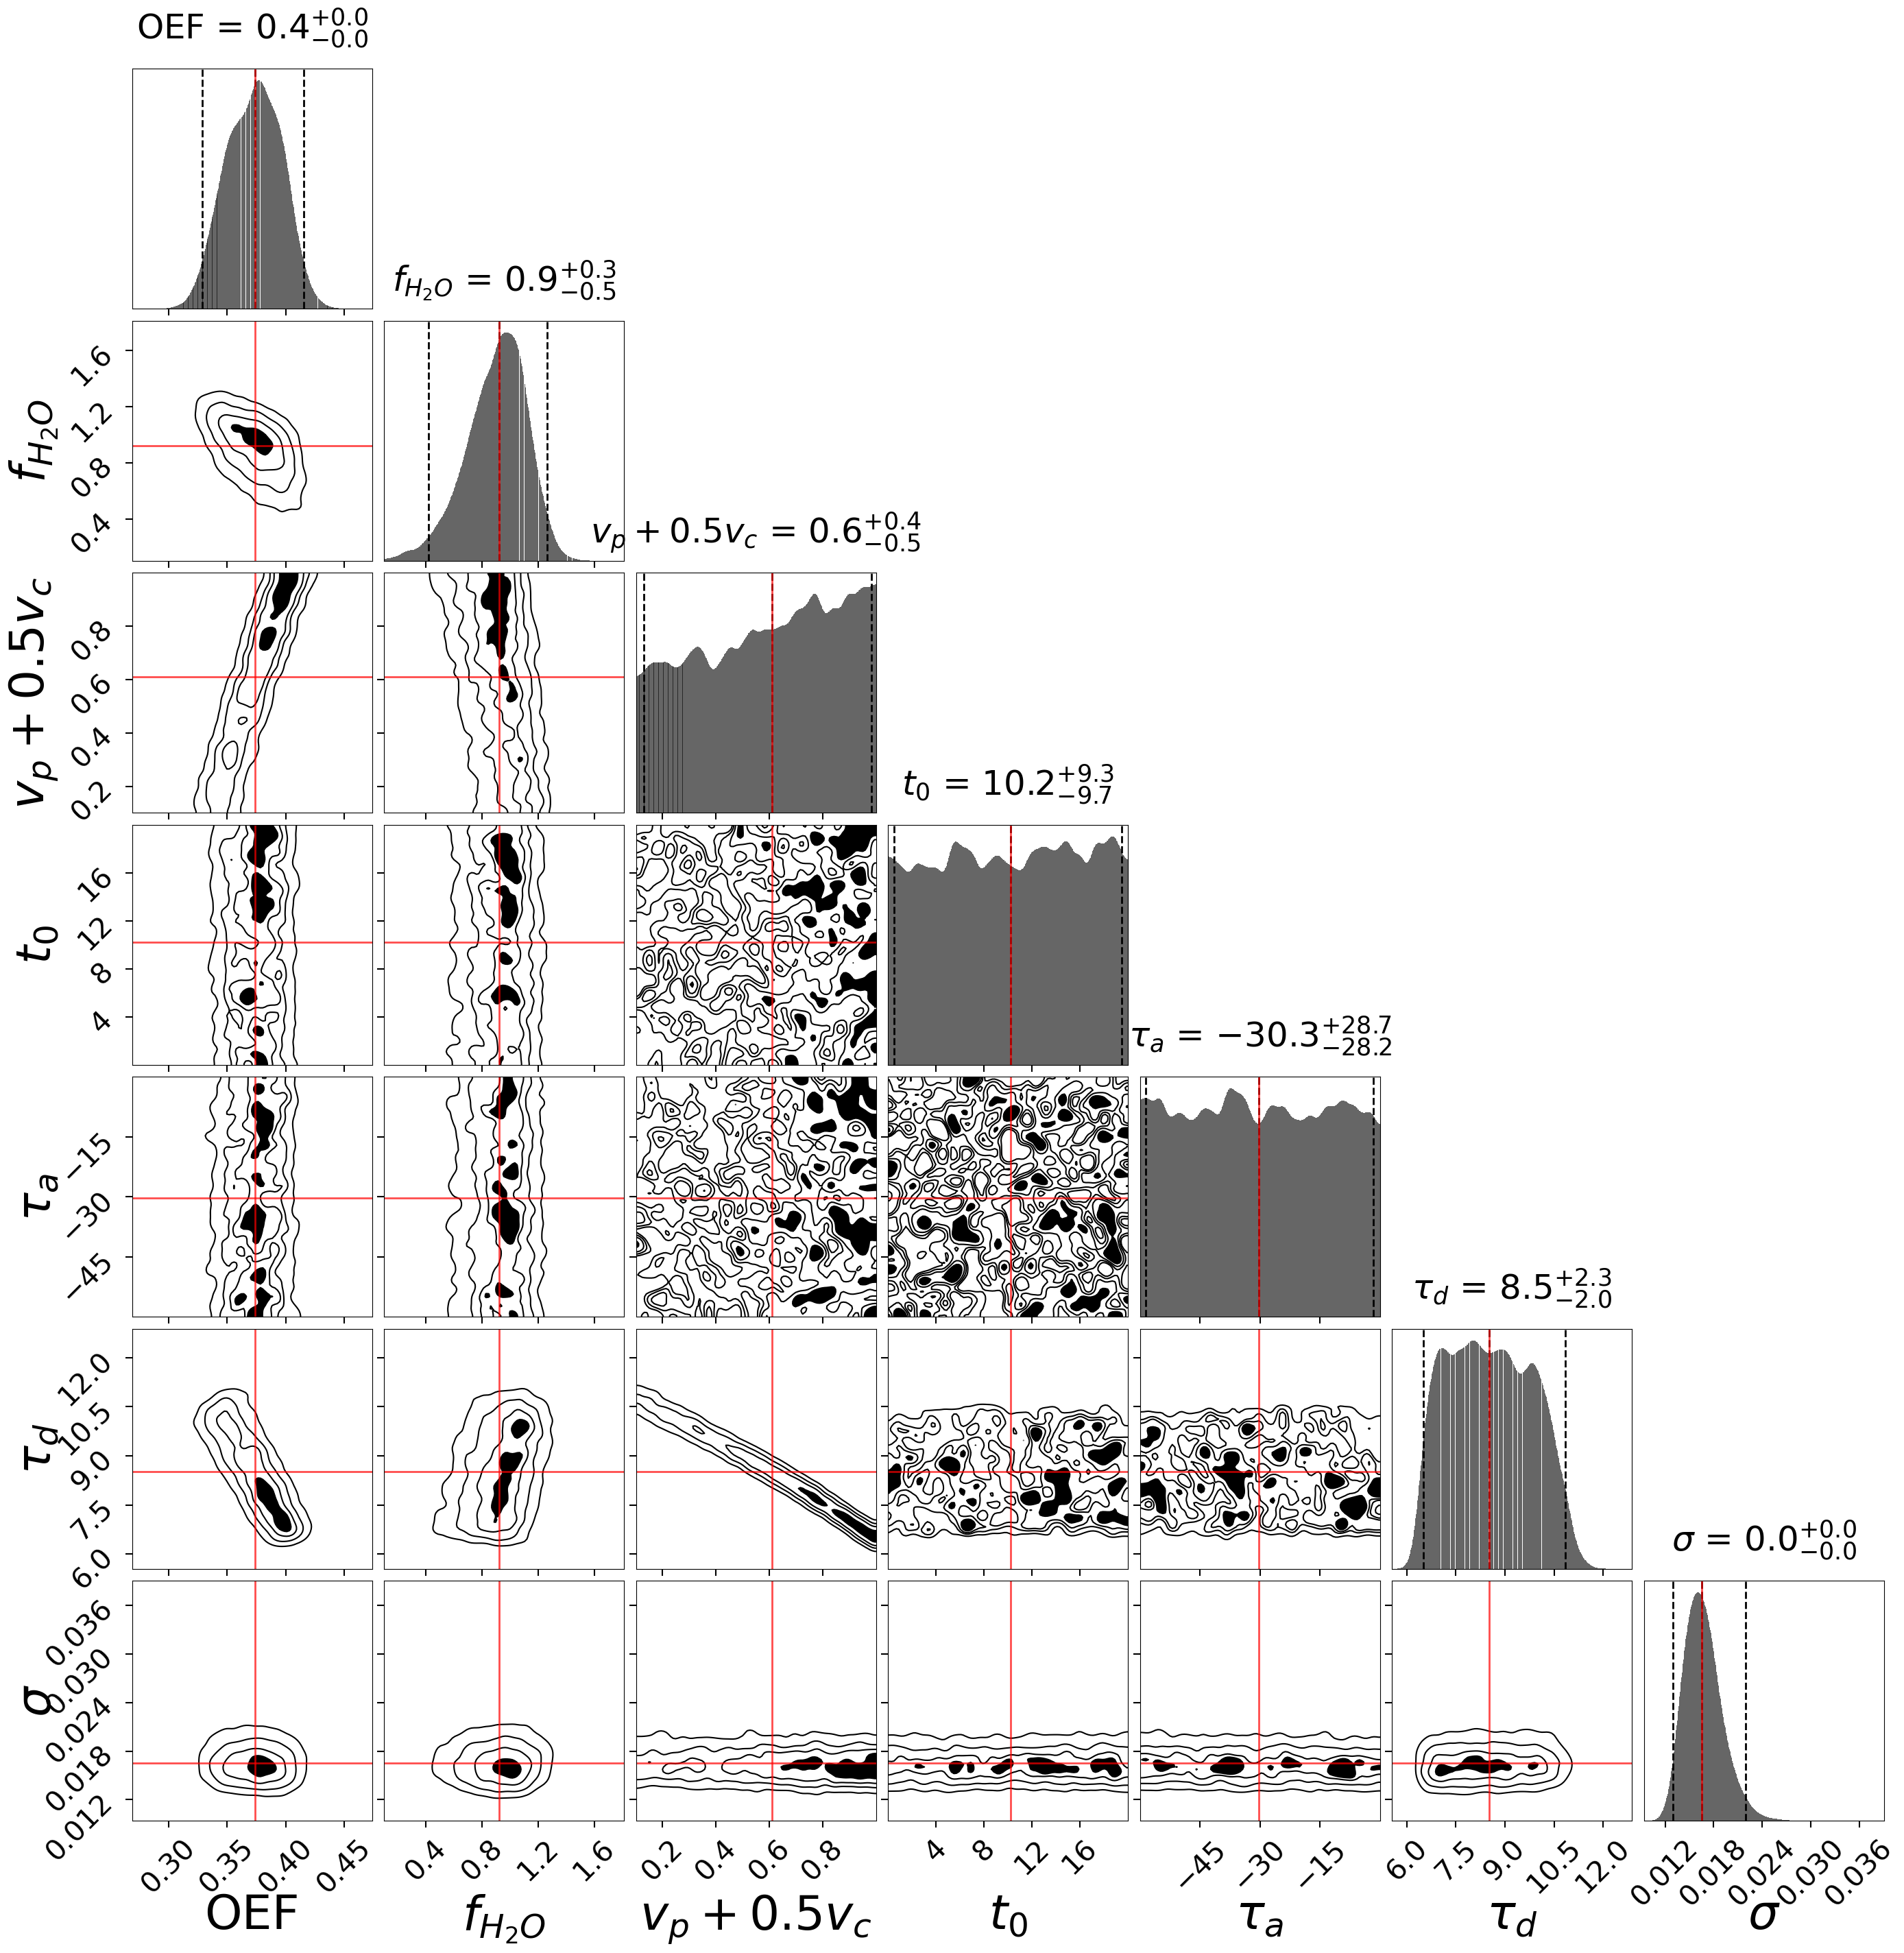

In [11]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_idif.save_results(res_idif, "playground-for-M1984M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_idif.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results